# Lab 5: pandas
Complete the following 2 problems using your knowledge of `DataFrames`. You will need the `pandas` library and the `matplotlib.pylab` library.

**Rubric**
- 4 points: Completes both problems as described
- 3 points: Completes one of the problems as described
- 2 points: Missing or incomplete


## Problem 1: Population Data 
In this example we will fetch data about countries and their population from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [36]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 


### Investigating DataFrames
Write code in the boxes below to display the following information:


1. The number of records `df_a`

In [37]:
len(df_a)

228

2. The last 11 rows of `df_a`

In [38]:
df_a.tail(11)

countries     1950     1955     1960     1965     1970     1975  \
217            Uruguay     2195     2354     2531     2694     2824     2844   
218         Uzbekistan     6293     7233     8532    10206    11941    13988   
219            Vanuatu       53       59       67       75       86      100   
220          Venezuela     5010     6171     7557     9068    10759    12675   
221            Vietnam    25349    27739    31657    37259    42577    48076   
222  Wallis and Futuna        7        8        8        9        9        9   
223     Western Sahara       10       16       28       50       90       73   
224              Yemen     4778     5266     5872     6511     7099     7935   
225             Zambia     2554     2870     3255     3695     4241     4849   
226           Zimbabwe     2854     3410     4011     4686     5515     6342   
227              World  2557629  2782099  3043002  3350426  3712698  4089084   

        1980  
217     2931  
218    15994  
219      117  
220    14768  
221    53716  
222       11  
223      125  
224     9133  
225     5541  
226     7170  
227  4451363

3. A 5 number summary of `df_a`

In [39]:
df_a.describe(percentiles=[]) #compact way to view various details and hide the percentile values

1950          1955          1960          1965          1970  \
count  2.280000e+02  2.280000e+02  2.280000e+02  2.280000e+02  2.280000e+02   
mean   2.243589e+04  2.440490e+04  2.669352e+04  2.939022e+04  3.256806e+04   
std    1.750677e+05  1.903733e+05  2.080701e+05  2.290908e+05  2.542257e+05   
min    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
50%    1.812500e+03  1.952500e+03  2.155500e+03  2.569500e+03  2.807000e+03   
max    2.557629e+06  2.782099e+06  3.043002e+06  3.350426e+06  3.712698e+06   

               1975          1980  
count  2.280000e+02  2.280000e+02  
mean   3.586970e+04  3.904757e+04  
std    2.802368e+05  3.049422e+05  
min    3.000000e+00  3.000000e+00  
50%    3.013500e+03  3.315000e+03  
max    4.089084e+06  4.451363e+06

4. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [40]:
df_a.index

RangeIndex(start=0, stop=228, step=1)

5. What is the largest population listed for 1970?

In [41]:
df_a = df_a.reset_index(drop=True)
df_a[1970].max()

3712698

6. What was the country for that entry?

In [42]:
df_a.loc[df_a[1970] == df_a[1970].max()] #checks all values in 1970 to find the highest one

countries     1950     1955     1960     1965     1970     1975     1980
227     World  2557629  2782099  3043002  3350426  3712698  4089084  4451363

7. What was the population of Austria from 1950-1980?

In [43]:
df_a.loc[df_a['countries'] == 'Austria'] #Checks all countries for the one that says Austria

countries  1950  1955  1960  1965  1970  1975  1980
12   Austria  6936  6947  7048  7271  7468  7579  7550

8. What was the population of France in 1965?

In [44]:
f=df_a.loc[df_a['countries'] == 'France']
f[1965]

68    49834
Name: 1965, dtype: int64

9. What was the population in 1980 of the 200th country on the list?

In [45]:
df_a.iloc[200,7:] #checks the 7th column which is 1980 then displays the 200th item

1980    18654
Name: 200, dtype: object

### Sorting and Joining Tables

10. What 5 entries had the highest population in 1970? Display their records.

In [46]:
df_a.sort_values(1970, ascending=False).head(5) #sorts each item from highest to lowest value in the 1970 column

countries     1950     1955     1960     1965     1970     1975  \
227          World  2557629  2782099  3043002  3350426  3712698  4089084   
41           China   562580   607047   651340   716667   822116   920295   
90           India   369881   404268   445394   494964   553889   618923   
215  United States   151869   165070   179980   193527   203985   215466   
165         Russia   101937   111126   119632   126542   130246   134294   

        1980  
227  4451363  
41    987822  
90    684888  
215   227225  
165   139039

11. Excluding the world, what 5 countries had the highest population in 1970? Display their records.

In [47]:
dfs=df_a.sort_values(1970, ascending=False)
dfs[1:6]

countries    1950    1955    1960    1965    1970    1975    1980
41           China  562580  607047  651340  716667  822116  920295  987822
90           India  369881  404268  445394  494964  553889  618923  684888
215  United States  151869  165070  179980  193527  203985  215466  227225
165         Russia  101937  111126  119632  126542  130246  134294  139039
91       Indonesia   82979   90255  100146  110754  122292  135214  150322

Below is code to scrape two more tables off of Wikipedia: World Populations from 1985-2015 and World Populations from 2020-2050. They are stored as the `DataFrames` `df_b` and `df_c` respectively. Use these two `DataFrames ` to answer the remaining questions.

In [48]:
for i in range(2):
    tbody = soup.find_all("tbody")
    tr = tbody[i+1].find_all("tr")
    arr = []
    mat = []
    for t in tr:
        lst = t.text.split("\n")
        for l in lst:
            if l == "":
                if arr != []:
                    arr = [arr[0]] + arr[1::2]
                    mat.append(arr)
                    arr = []
            else:
                try: 
                    arr.append(int(l.lstrip('\xa0').replace(",","")))
                except ValueError:
                    arr.append(str(l.lstrip('\xa0').replace(",","")))
    titles = mat[0]
    titles[0] = "countries"
    mat = mat[1:]
    if i == 0: df_b = pd.DataFrame.from_records(mat, columns=titles) 
    else: df_c = pd.DataFrame.from_records(mat, columns=titles) 

df_b.set_index('countries', inplace=True) 
df_c.set_index('countries', inplace=True) 
# where df_a is 1950-1980, df_b is 1985-2015, df_c is 2020-2050

12. What are the dimensions of these two `DataFrames`? 

In [49]:
print(df_b.shape)
print(df_c.shape)

(227, 7)
(228, 7)


13. Combine all three tables into a `DataFrame ` called `df` that stores a country's population from 1950-2050 and display its first 5 entries.

In [50]:
df_a.set_index('countries', inplace=True)
df = df_a.join([df_b, df_c], how='outer') #combines dataframes based on their index and makes new indexes for indexes that don't exist in previous dataframes
df.head(5)

1950  1955   1960   1965   1970   1975   1980     1985  \
countries                                                                
Afghanistan     8151  8892   9830  10998  12431  14133  15045  13120.0   
Albania         1228  1393   1624   1884   2157   2402   2672   2957.0   
Algeria         8893  9842  10910  11964  13932  16141  18807  22009.0   
American Samoa    20    20     21     25     28     30     33     39.0   
Andorra            7     7      9     14     20     27     34     45.0   

                   1990     1995  ...     2005     2010     2015   2020  \
countries                         ...                                     
Afghanistan     13569.0  19446.0  ...  26335.0  29121.0  32565.0  36644   
Albania          3245.0   3159.0  ...   3025.0   2987.0   3030.0   3075   
Algeria         25191.0  28322.0  ...  32918.0  35950.0  39543.0  42973   
American Samoa     48.0     54.0  ...     57.0     56.0     55.0     54   
Andorra            53.0     64.0  ...     77.0     85.0     86.0     86   

                 2025   2030   2035   2040   2045   2050  
countries                                                 
Afghanistan     41118  45665  50195  54717  59256  63796  
Albania          3105   3103   3063   2994   2913   2825  
Algeria         45842  48149  50118  52030  53894  55445  
American Samoa     54     53     52     51     50     50  
Andorra            86     85     83     82     79     75  

[5 rows x 21 columns]

14. What was country with the smallest population in 2000?

In [51]:
df.loc[df[2000] ==df[2000].min()]

1950  1955  1960  1965  1970  1975  1980  1985  1990  1995  ...  \
countries                                                               ...   
Montserrat    14    13    13    12    12    13    12  12.0  11.0  11.0  ...   

            2005  2010  2015  2020  2025  2030  2035  2040  2045  2050  
countries                                                               
Montserrat   5.0   6.0   6.0     6     6     6     6     6     6     6  

[1 rows x 21 columns]

15. What was the mean population in 2005?

In [52]:
df[2005].mean()

57031.33480176212

### Plotting with Matplotlib
We are going to use `matplotlib` to visualize our data. 

Import it below.

In [53]:
import matplotlib.pylab as plt
df

1950     1955     1960     1965     1970     1975     1980  \
countries                                                                       
Afghanistan        8151     8892     9830    10998    12431    14133    15045   
Albania            1228     1393     1624     1884     2157     2402     2672   
Algeria            8893     9842    10910    11964    13932    16141    18807   
American Samoa       20       20       21       25       28       30       33   
Andorra               7        7        9       14       20       27       34   
...                 ...      ...      ...      ...      ...      ...      ...   
Western Sahara       10       16       28       50       90       73      125   
Yemen              4778     5266     5872     6511     7099     7935     9133   
Zambia             2554     2870     3255     3695     4241     4849     5541   
Zimbabwe           2854     3410     4011     4686     5515     6342     7170   
World           2557629  2782099  3043002  3350426  3712698  4089084  4451363   

                     1985       1990       1995  ...       2005       2010  \
countries                                        ...                         
Afghanistan       13120.0    13569.0    19446.0  ...    26335.0    29121.0   
Albania            2957.0     3245.0     3159.0  ...     3025.0     2987.0   
Algeria           22009.0    25191.0    28322.0  ...    32918.0    35950.0   
American Samoa       39.0       48.0       54.0  ...       57.0       56.0   
Andorra              45.0       53.0       64.0  ...       77.0       85.0   
...                   ...        ...        ...  ...        ...        ...   
Western Sahara      180.0      218.0      264.0  ...      416.0      492.0   
Yemen             10540.0    12417.0    14832.0  ...    20003.0    23210.0   
Zambia             6536.0     7604.0     8691.0  ...    11373.0    13042.0   
Zimbabwe           8561.0    10157.0    11160.0  ...    11640.0    11652.0   
World           4856463.0  5288956.0  5699203.0  ...  6473045.0  6866333.0   

                     2015     2020     2025     2030     2035     2040  \
countries                                                                
Afghanistan       32565.0    36644    41118    45665    50195    54717   
Albania            3030.0     3075     3105     3103     3063     2994   
Algeria           39543.0    42973    45842    48149    50118    52030   
American Samoa       55.0       54       54       53       52       51   
Andorra              86.0       86       86       85       83       82   
...                   ...      ...      ...      ...      ...      ...   
Western Sahara      571.0      653      736      822      909      998   
Yemen             26738.0    29885    32823    35660    38437    41142   
Zambia            15067.0    17427    20105    23137    26546    30339   
Zimbabwe          14230.0    15832    17371    18820    20282    21840   
World           7256491.0  7643403  8006581  8340607  8646305  8925950   

                   2045     2050  
countries                         
Afghanistan       59256    63796  
Albania            2913     2825  
Algeria           53894    55445  
American Samoa       50       50  
Andorra              79       75  
...                 ...      ...  
Western Sahara     1086     1174  
Yemen             43710    46081  
Zambia            34497    38993  
Zimbabwe          23492    25199  
World           9180224  9408142  

[228 rows x 21 columns]

Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 1950-2050. Your graph needs to include a  proper title, axis labels, and legend.

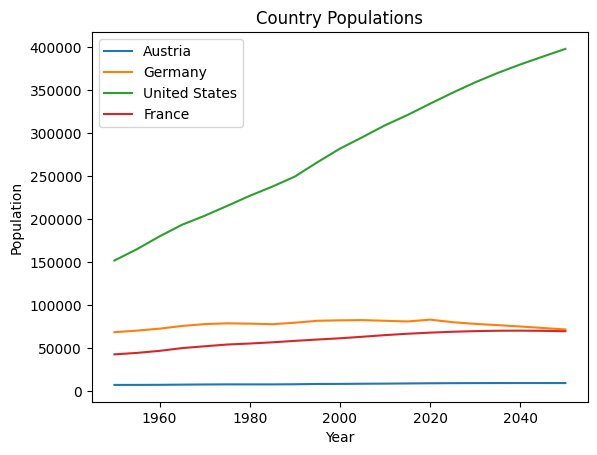

In [54]:
df.loc['Austria'].plot(title = 'Country Populations') #finds the country with the name "Austria" and displays all of it values on the graph
df.loc['Germany'].plot(title = 'Country Populations')
df.loc['United States'].plot(title = 'Country Populations')
df.loc['France'].plot(title = 'Country Populations')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Austria','Germany','United States','France'])

#### Challenge(Optional): Plot 5 most populous countries from 2010 and 2050
Display a plot of the population from 1950-2050 of the 5 most populous countries from 2010 side-by-side with a plot of the population from 1950-2050 of the 5 most populous countries from 2050

## Problem 2: Rotten Tomatoes Database

We are going to use a dataset of Rotten Tomatoes scores. I have imported it for you, as the `DataFrame` called `movies`.

In [55]:
# Get this one from the internet but also use the IMDB one
from io import StringIO  
movie_txt = requests.get('https://raw.github.com/cs109/cs109_data/master/movies.dat').text
movie_file = StringIO(movie_txt) # treat a string like a file
movies = pd.read_csv(movie_file, delimiter='\t')
movies

id                        title   imdbID  \
0         1                    Toy story   114709   
1         2                      Jumanji   113497   
2         3               Grumpy Old Men   107050   
3         4            Waiting to Exhale   114885   
4         5  Father of the Bride Part II   113041   
...     ...                          ...      ...   
9418  65037                        Ben X   953318   
9419  65088              Bedtime Stories   960731   
9420  65091          Manhattan Melodrama    25464   
9421  65126                        Choke  1024715   
9422  65133      Blackadder Back & Forth   212579   

                                           spanishTitle  \
0                                  Toy story (juguetes)   
1                                               Jumanji   
2                                   Dos viejos gruñones   
3                                  Esperando un respiro   
4     Vuelve el padre de la novia (Ahora también abu...   
...                                                 ...   
9418                                              Ben X   
9419                             Más allá de los sueños   
9420                        El enemigo público número 1   
9421                                              Choke   
9422                            Blackadder Back & Forth   

                                         imdbPictureURL  year  \
0     http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...  1995   
1     http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...  1995   
2     http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...  1993   
3     http://ia.media-imdb.com/images/M/MV5BMTczMTMy...  1995   
4     http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...  1995   
...                                                 ...   ...   
9418  http://ia.media-imdb.com/images/M/MV5BMTkxMDMy...  2007   
9419  http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...  2008   
9420  http://ia.media-imdb.com/images/M/MV5BMTUyODE3...  1934   
9421  http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...  2008   
9422  http://ia.media-imdb.com/images/M/MV5BMjA5MjU4...  1999   

                             rtID rtAllCriticsRating rtAllCriticsNumReviews  \
0                       toy_story                  9                     73   
1                 1068044-jumanji                5.6                     28   
2                  grumpy_old_men                5.9                     36   
3               waiting_to_exhale                5.6                     25   
4     father_of_the_bride_part_ii                5.3                     19   
...                           ...                ...                    ...   
9418               10009212-ben_x                6.3                     36   
9419              bedtime_stories                4.4                    104   
9420          manhattan_melodrama                  7                     12   
9421                        choke                5.6                    135   
9422        blackadder-back-forth                  0                      0   

     rtAllCriticsNumFresh  ... rtAllCriticsScore rtTopCriticsRating  \
0                      73  ...               100                8.5   
1                      13  ...                46                5.8   
2                      24  ...                66                  7   
3                      14  ...                56                5.5   
4                       9  ...                47                5.4   
...                   ...  ...               ...                ...   
9418                   24  ...                66                6.1   
9419                   26  ...                25                4.7   
9420                   10  ...                83                  0   
9421                   73  ...                54                4.9   
9422                    0  ...                 0                  0   

     rtTopCriticsNumReviews rtTopCriticsNumFresh rtTopCriticsNumRotten  \
0     

1. What do each of the columns of this `DataFrame` mean? Fill in the following box with a short description of each of the columns. Be specific!

If you need some help [look at the README](https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-readme.txt) for the dataset.

- id is just a number that is given to each movie to identify it
- title is the name of the movie
- imdbid is the id that imdb gave the movie
- Spanish title is the name of the movie in spanish
- imdbpictureurl is the link to the picture used for the movie on imdb
- year is the year the movie was released
- rtid is the id that rotten tomatoes gave to the movie
- rtallcriticsratings is the average critic rating from rotten tomatoes
- rtallcriticsnumreviews is the amount of critic reviews from rotten tomatoes
- rtallcriticsnumfresh is the amount of critics who thought the movie was fresh
- rtallcriticsscore the score the mvie got from critics
- rttopcriticsratings is the rating from rotten tomatoes' top critics
- rttopcriticsnumreviews is the amount of reviews from the top critics
- rttopcriticsnumfresh is the amount of top critics who thought it was fresh
- rttopcriticsnumrotten is the amount of top critics who thought it was rotten
- rttopcriticsscore is the score given from the top critics
- rtaudiencerating is the rating from the audience
- rtaudiencenumratings is the amount of ratings from the audience
- rtaudiencescore is the average score from the audience
- rtpictureurl is the url to the image used on rotten tomatoes

2. Set the column `id` as the index for the dataset.

In [56]:
# for i in range(len(movies)): #goes through each entry in movies and sets the id equal to the index 
#     movies['id'][i] = i
# movies
movies.set_index(['id'], inplace=True)

3. We want to make a plot of the top 10 highest rated movies on Rotten Tomatoes by Audience Score. Sort the table by `rtAudienceScore` and make a plot of the top 10 movies. What happens?


*Matplotlib tip: use `plt.bar(df['x_col'], df['y_col'],...)` then use other matplotlib methods to add important features to the graph*

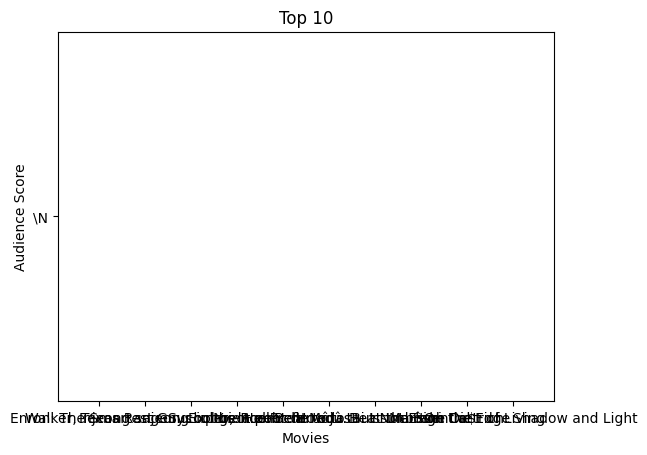

In [57]:
scores=movies.sort_values('rtAudienceScore', ascending=False)#sorts scores highest to lowest by audience score
plt.bar(scores['title'][:10],scores['rtAudienceScore'][:10])#plot the top 10 items on a bar graph
plt.xlabel('Movies')
plt.ylabel('Audience Score')
plt.title('Top 10')
plt.show()

4. What has happened to our plot? How can we remove our empty values? Remove those values and try it again?

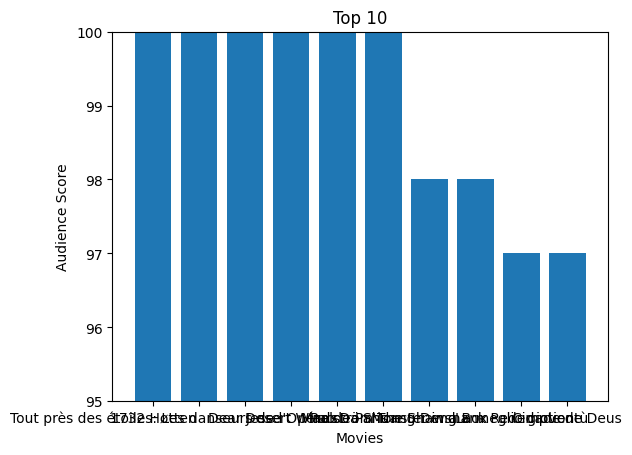

In [58]:
scores = scores.dropna()#gets rid of items that have any empty values
scores['rtAudienceScore'] = pd.to_numeric(scores['rtAudienceScore'], errors='coerce')#changes the audience scorer column to be recognized as numbers
scores = scores.sort_values('rtAudienceScore', ascending=False)
plt.bar(scores['title'].head(10),scores['rtAudienceScore'].head(10))
plt.xlabel('Movies')
plt.ylabel('Audience Score')
plt.title('Top 10')
plt.ylim(95,100)#narrows the displayed y values
plt.show()

5. Does this plot look right? What other rows might we want to exclude or columns we might want to sort by, so our top 10 list looks more similar to other lists.

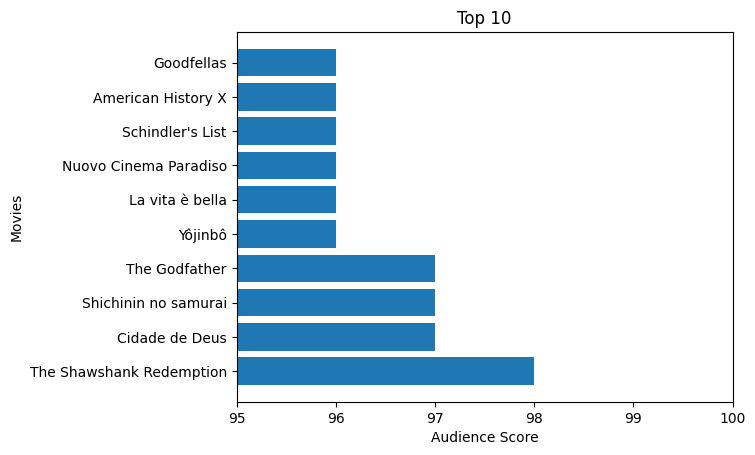

In [59]:
scores['rtAudienceNumRatings'] = pd.to_numeric(scores['rtAudienceNumRatings'], errors='coerce') #makes the computer recognize the values in audience ratings as numbers
b=pd.DataFrame(columns=scores.columns) #gives dataframe b the same columns as scores
for i in range(len(scores)):
    if scores['rtAudienceNumRatings'].iloc[i] > 10000: #if the movies didn't get 10000+ ratings it won't be included in the graph
        b.loc[len(b.index)] = scores.iloc[i]
plt.barh(b['title'].head(10),b['rtAudienceScore'].head(10))
plt.xlabel('Audience Score')
plt.ylabel('Movies')
plt.title('Top 10')
plt.xlim(95,100)
plt.show()

6. We want to know what years the most popular movies were made in. In the box below, rewrite our question/statement as something that is is specific and answerable using our dataset. There is no one "correct" answer here. 

New question: Which years had the highest average audience score?

7. Create a plot that answers your new question.

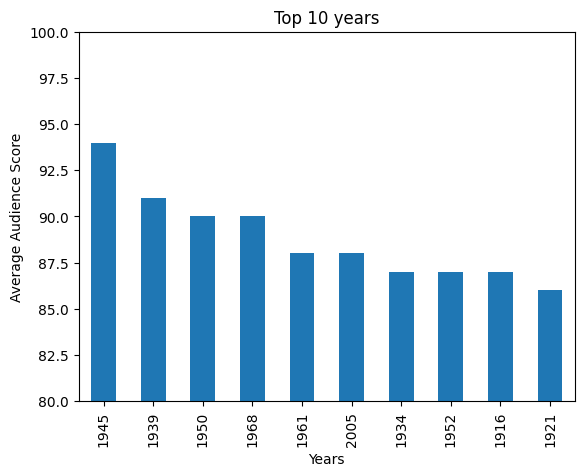

In [60]:
years = scores.groupby('year') #separates movies into groups based on the year they were made
a = years.mean(numeric_only=True) #finds the mean of all number values in each group
a['rtAudienceScore'] = pd.to_numeric(scores['rtAudienceScore'], errors='coerce') 
asorted = a.sort_values('rtAudienceScore', ascending=False) #sorts the years based on which ones have the highest audience score
b = asorted.head(10)
b['rtAudienceScore'].plot(kind='bar') #plots the 10 highest years
plt.xlabel('Years')
plt.ylabel('Average Audience Score')
plt.title('Top 10 years')
plt.ylim(80,100)
plt.show()

8. What if we want to balance audience and critics scores? Create a new column called `rtWeightedScores` to store a movies' overall weighted average score of 70% Top Critics Scores and 30% Audience Scores.  

In [61]:
scores['rtTopCriticsScore'] = pd.to_numeric(scores['rtTopCriticsScore'], errors='coerce') 
scores['rtWeightedScores'] = scores['rtTopCriticsScore']*7/10+scores['rtAudienceScore']*3/10 #makes a new column that is a combination of the critics and audience scores
scores

title  imdbID  \
id                                                                 
4311                                         1732 Høtten  157411   
5811   Tout près des étoiles: Les danseurs de l'Opéra...  260713   
1901                                          Dear Jesse  150290   
395                                         Desert Winds  112849   
5071                                           Maelström  220627   
...                                                  ...     ...   
5550                                      Love Me Tender   49452   
5551                           The Return of the Vampire   37219   
5552                         The Revenge of Frankenstein   50894   
5554                                 Wild in the Country   55623   
65133                            Blackadder Back & Forth  212579   

                                            spanishTitle  \
id                                                         
4311                                         1732 Høtten   
5811   Tout près des étoiles: Les danseurs de l'Opéra...   
1901                                          Dear Jesse   
395                                         Desert Winds   
5071                                           Maelström   
...                                                  ...   
5550                                      Love Me Tender   
5551                           The Return of the Vampire   
5552                         The Revenge of Frankenstein   
5554                                 Wild in the Country   
65133                            Blackadder Back & Forth   

                                          imdbPictureURL  year  \
id                                                               
4311   http://ia.media-imdb.com/images/M/MV5BMTk5NzA2...  1998   
5811   http://ia.media-imdb.com/images/M/MV5BMTcwNjc0...  2001   
1901   http://ia.media-imdb.com/images/M/MV5BMTkyNTMy...  1998   
395    http://ia.media-imdb.com/images/M/MV5BMjA0NDc0...  1995   
5071   http://ia.media-imdb.com/images/M/MV5BMjEyODcy...  2000   
...                                                  ...   ...   
5550   http://ia.media-imdb.com/images/M/MV5BNzg2MzY0...  1956   
5551   http://ia.media-imdb.com/images/M/MV5BMTU0OTQ5...  1944   
5552   http://ia.media-imdb.com/images/M/MV5BMTMyNTUy...  1958   
5554   http://ia.media-imdb.com/images/M/MV5BMjEzOTcw...  1961   
65133  http://ia.media-imdb.com/images/M/MV5BMjA5MjU4...  1999   

                                            rtID rtAllCriticsRating  \
id                                                                    
4311                               bloody-angels                6.7   
5811   etoiles_dancers_of_the_paris_opera_ballet                6.1   
1901                                  dear_jesse                6.8   
395                                 desert_winds                4.3   
5071                                  maelstroem                6.7   
...                                          ...                ...   
5550                              love_me_tender                5.4   
5551                       return_of_the_vampire                5.3   
5552                     revenge_of_frankenstein                6.2   
5554                         wild_in_the_country                5.8   
65133                      blackadder-back-forth                  0   

      rtAllCriticsNumReviews rtAllCriticsNumFresh rtAllCriticsNumRotten  ...  \
id                                                                       ...   
4311                       8                    6                     2  ...   
5811                      13                    8                     5  ...   
1901                       6                    5                     1  ...   
395                        9                    2                     7  ...   
5071                      35                   28                     7  ...   
...                      ...              

9. Create a histogram to show the number of movies with each weighted score. Your "buckets" should be from 0-10 and go up by 0.5. 

(array([2291.,  137.,  357.,  368.,  339.,  247.,  244.,  298.,  291.,
         302.,  360.,  363.,  337.,  319.,  376.,  344.,  429.,  481.,
         629.,  463.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

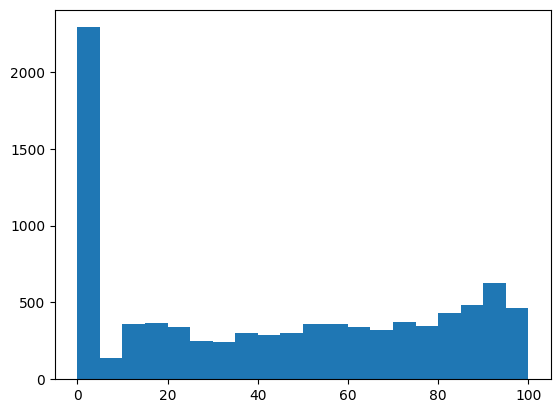

In [62]:
plt.hist(scores['rtWeightedScores'], bins=20)

10. What are the top 10 movies based on our new list?

In [63]:
a = scores.sort_values('rtWeightedScores', ascending=False)
a.head(10)

title  imdbID              spanishTitle  \
id                                                              
4311            1732 Høtten  157411               1732 Høtten   
1901             Dear Jesse  150290                Dear Jesse   
7620       Monster in a Box  102467          Monster in a Box   
47     Shichinin no samurai   47478        Los siete samuráis   
858           The Godfather   68646                El padrino   
665             Underground  114787               Underground   
6896                  Shoah   90015                     Shoah   
2931         Dom za vesanje   97223  El tiempo de los gitanos   
26082               Seppuku   56058                   Seppuku   
6669                  Ikiru   44741                     Vivir   

                                          imdbPictureURL  year  \
id                                                               
4311   http://ia.media-imdb.com/images/M/MV5BMTk5NzA2...  1998   
1901   http://ia.media-imdb.com/images/M/MV5BMTkyNTMy...  1998   
7620   http://ia.media-imdb.com/images/M/MV5BMTQ0ODIw...  1992   
47     http://ia.media-imdb.com/images/M/MV5BNzg5Mzk5...  1954   
858    http://ia.media-imdb.com/images/M/MV5BMTc3MDQz...  1972   
665    http://ia.media-imdb.com/images/M/MV5BMTgzMjI0...  1995   
6896   http://ia.media-imdb.com/images/M/MV5BMTQ3NDUz...  1985   
2931   http://ia.media-imdb.com/images/M/MV5BMTM4MjY1...  1988   
26082  http://ia.media-imdb.com/images/M/MV5BMTA5ODk4...  1962   
6669   http://ia.media-imdb.com/images/M/MV5BMTcyMDU0...  1952   

                                   rtID rtAllCriticsRating  \
id                                                           
4311                      bloody-angels                6.7   
1901                         dear_jesse                6.8   
7620                   monster_in_a_box                6.6   
47                1018639-seven_samurai                9.2   
858                           godfather                  9   
665                 1088763-underground                7.5   
6896                              shoah                8.8   
2931   a-time-of-gypsies-dom-za-vesanje                7.1   
26082                     harakiri_1963                  0   
6669                              ikiru                8.6   

      rtAllCriticsNumReviews rtAllCriticsNumFresh rtAllCriticsNumRotten  ...  \
id                                                                       ...   
4311                       8                    6                     2  ...   
1901                       6                    5                     1  ...   
7620                      14                   13                     1  ...   
47                        49                   49                     0  ...   
858                       66                   66                     0  ...   
665                       18                   15                     3  ...   
6896                      12                   12                     0  ...   
2931                       5                    5                     0  ...   
26082                      3                    3                     0  ...   
6669                      30                   30                     0  ...   

      rtTopCriticsRating rtTopCriticsNumReviews rtTopCriticsNumFresh  \
id                                                                     
4311                   0                      2                    2   
1901                   0                      1                    1   
7620                   0                      2                    2   
47                   8.6                     10                   10   
858                  8.4                     11                   11   
665                    0                      4                    4   
6896                   0                      1                    1   
2931                   0                      2                    2   
26082                 